In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in orginal dataframe
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

# NEED TO EDIT/CLEAN INTERNET DATA

# Q4

In [3]:
#looking at top 5 rows of the dataframe(df)
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
#looking at bottom 5 rows of the df
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


# Q5

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Answer : 4 columns, 7662 rows; data types are country - object; year - int; value and value footnotes - float

# Q6

In [6]:
#drop column with null values
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [8]:
#rename columns
gdp_fn = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

# Q7

In [9]:
#count each year data was collected
count_of_countries= gdp_df['Country or Area'].value_counts().reset_index(name='Counts')
print(count_of_countries)
print(count_of_countries.tail(50))

                                  Country or Area  Counts
0    Least developed countries: UN classification      33
1                      Middle East & North Africa      33
2         Middle East & North Africa (IDA & IBRD)      33
3                                   Middle income      33
4                                        Mongolia      33
..                                            ...     ...
237                                        Kosovo      15
238                     Sint Maarten (Dutch part)      14
239                      Turks and Caicos Islands      12
240                                       Somalia      10
241                                      Djibouti      10

[242 rows x 2 columns]
                                   Country or Area  Counts
192                                         France      33
193                                          Gabon      33
194                                        Albania      33
195                          Europe & Centra

In [10]:
#all_years: counts countries not missing data
all_years=count_of_countries[count_of_countries["Counts"]== 33].count()

#missing:counts countries with missing data
missing= count_of_countries[count_of_countries["Counts"]< 33].count()

#missing_names: lists countries with missing data
missing_names= count_of_countries[count_of_countries["Counts"]< 33]

print(missing)
print(all_years)
print(missing_names)

Country or Area    40
Counts             40
dtype: int64
Country or Area    202
Counts             202
dtype: int64
               Country or Area  Counts
202                    Hungary      32
203                    Lebanon      32
204                      Aruba      32
205                      Tonga      32
206                     Bhutan      32
207            Slovak Republic      31
208                     Kuwait      31
209               Turkmenistan      31
210                   Cambodia      30
211         West Bank and Gaza      29
212     Bosnia and Herzegovina      29
213                     Latvia      28
214                     Israel      28
215                    Estonia      28
216                     Serbia      28
217                  Lithuania      28
218                    Iceland      28
219                    Moldova      28
220                   Maldives      28
221                    Croatia      28
222                   Slovenia      28
223               Small st

#Answer: 202 countries have data for all the years

# Q8

In [11]:
d2020=gdp_df[gdp_df["Year"]==2020]
print(d2020)

                  Country or Area  Year         Value
1                     Afghanistan  2020   1968.341002
22    Africa Eastern and Southern  2020   3455.023119
55     Africa Western and Central  2020   3957.933804
88                        Albania  2020  13278.369769
121                       Algeria  2020  10844.770764
...                           ...   ...           ...
7503                     Viet Nam  2020  10450.622382
7536           West Bank and Gaza  2020   5402.538773
7565                        World  2020  16204.169107
7598                       Zambia  2020   3183.650773
7631                     Zimbabwe  2020   1990.319419

[242 rows x 3 columns]


C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


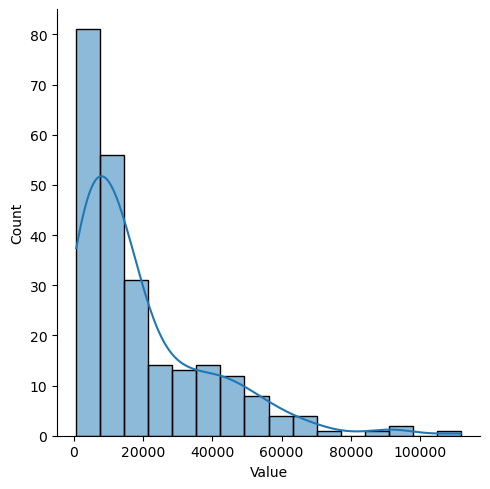

In [12]:
#histogram
sns.displot(data=d2020["Value"], kde=True)

(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <BarContainer object of 10 artists>)

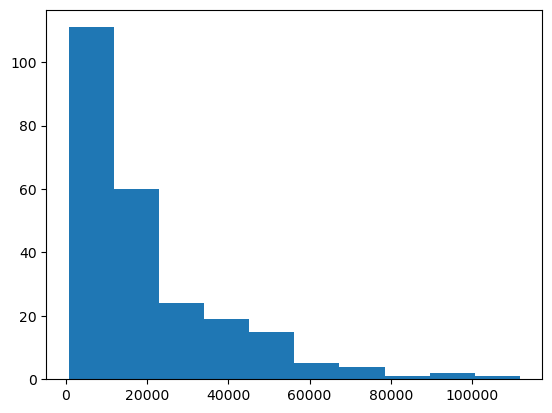

In [14]:
#histogram using matplotlib
plt.hist(d2020.Value)

In [ ]:
#density plot
sns.kdeplot(d2020['Value'],fill=True)

In [ ]:
# FIX BOXPLOT AND VIOLIN PLOT

In [ ]:
#boxplot
sns.boxplot(x=d2020["Country or Area"], y=d2020["Value"])

In [ ]:
#violin plot of 2020 GDP per capita
sns.violinplot(x=d2020["Country or Area"], y=d2020["Value"])

# Q9

In [ ]:
#median GDP per capita value in 2020
med_gdp_2020= gdp_df[gdp_df["Year"]==2020]["Value"].median()
print(med_gdp_2020)

# Q10

In [21]:
#subsetting data to only include the years 1990, 2000, 2010, and 2020 
years=[1990,2000,2010,2020]
gdp_decades=gdp_fn[gdp_fn["Year"].isin(years)]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


In [ ]:
#box plot


<BarContainer object of 921 artists>

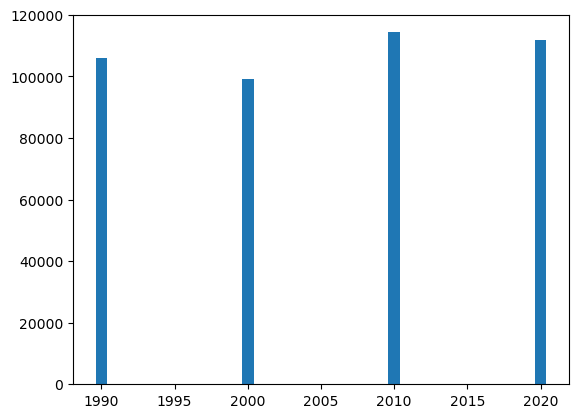

In [34]:
#bar plot
plt.bar(gdp_decades.Year,gdp_decades.GDP_Per_Capita)



In [ ]:
#scatterplot

In [ ]:
#scratteplot with trendline

# Q 12 

In [50]:
# add country name

#max GDP per capita value in 2020
max_gdp_2020= gdp_fn[gdp_fn["Year"]==2020]
max_gdp_2020.sort_values(by =['GDP_Per_Capita'],ascending=False).head(1)


,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


# Q 13

In [58]:
# add country name

#min GDP per capita value in 2020
min_gdp_2020= gdp_fn[gdp_fn["Year"]==2020]
min_gdp_2020.sort_values(by =['GDP_Per_Capita'],ascending=True)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


# Bonus - IN PROGRESS

In [57]:
min_gdp_1990= gdp_fn[gdp_fn["Year"]==1990]
min_gdp_1990.sort_values(by =['GDP_Per_Capita'],ascending=True)


,Country,Year,GDP_Per_Capita
4854,Mozambique,1990,460.123697
4887,Myanmar,1990,581.613311
2127,Ethiopia,1990,767.170419
7236,Uganda,1990,901.660809
5865,Rwanda,1990,933.013443
...,...,...,...
6775,Switzerland,1990,56232.026080
711,Bermuda,1990,65961.406278
904,Brunei,1990,70358.724094
4178,Luxembourg,1990,70860.819124


# how to merge 2 data frames: mergedStuff = pd.merge(df1, df2, on=['Name'], how='inner')

#not right
less= min_gdp_1990["GDP_Per_Capita"]> min_gdp_2020["GDP_Per_Capita"]

In [71]:
#inner join
mergedy = min_gdp_1990.merge(min_gdp_2020, on = ['Country'], how='inner')


In [73]:
mergedy[mergedy['GDP_Per_Capita_x']> mergedy['GDP_Per_Capita_y']]

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
15,Barbados,1990,14097.395550,2020,13805.777541
25,Brunei,1990,70358.724094,2020,61603.550804
28,Burundi,1990,1175.155086,2020,711.355263
34,Central African Republic,1990,1200.613390,2020,847.765012
41,Congo,1990,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312
68,Gabon,1990,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591
78,Haiti,1990,3612.815105,2020,2970.462845


# Q14

In [68]:
#read in internet dataframe footnotes at the bottom of the csv file needed to be ignored by limiting what row it reads until
internet_df = pd.read_csv('../data/internet_use.csv.csv',nrows=4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
